### LSE Data Analytics Online Career Accelerator

# DA201: Data Analytics using Python

## COVID-19 data

### Assignment Brief

To act as a data analyst working with the UK government to analyse COVID-19 data (from January 2020 to October 2021).

### Context

As part of its goal to increase the number of fully vaccinated individuals (people who have received a first and second dose of the vaccine), the government is planning to launch a series of marketing campaigns to promote the vaccine. The government wants to identify trends and patterns that can be used to inform its marketing approach to increase the number of fully vaccinated people.

### Required Actions

Use Python to analyse the data to identify patterns and trends that could help inform the UK governments marketing strategy to promote the vaccine and ultimately increase the vaccination rate. The government would like to understand:

- Total vaccinations (first dose, second dose per region, total and overtime) are for a particular region
- Where they should target the first marketing campaign(s) based on:

    - area(s) with the largest number of people who have received a first dose but no second dose
    - area with the greatest number of recoveries so that they can avoid this area in their initial campaign runs
    - whether deaths have been increasing across all regions over time or if a peak has been reached
    - what other types of Twitter data points and tweets have both #coronavirus and #vaccinated hashtags
    - which regions have experienced a peak in hospitalisation numbers and if there are regions that have not reached a peak yet

## 1. Assignment Activity 1

### 1.1 Report / notebook expectations

### Access the GitHub repo

- [Michelle Halpin Github Repo](https://github.com/jenroseald/LSE_DA201_COVID_Analysis_Michelle_Halpin)
- Screenshot of my Repo

![GitHubScreenshot2](attachment:GitHubScreenshot2.png)

### 1.2 Tools used to support analysis: GitHub

Data sources can change and develop over time. This means that the code analysts write to inform analysis projects will also need to change to reflect and accommodate these developments. In addition, analysis projects can be conducted with teams of people that change over time. Having the ability to have shared access to code that enables collaboration in a structured and managed way will greatly enhance the effectiveness, accuracy and integrity of on-going business analysis.

GitHub enables this process by providing structured version control of coding content. GitHub offers a repository (repo) service that enables controlled collaboration amongst designated users.

As GitHub repos can be set to either public or private, they offer a ‘safe’ space to test code. The collaborative, sharing functionality also helps users to develop their coding knowledge and understanding. Repos can also serve as professional portfolios which can enable employers to connect with potential employees.

This analysis will aim to leverage the GitHub benefits described here though the creation of a GitHub repo to store and share data, findings and insights.

## 2. Assignment activity two

- Load the files `covid_19_uk_cases.csv` and `covid_19_uk_vaccinated.csv` and explore the data
- Explore the data using the `info()`, `describe()`, `shape` and `value_counts()` methods
- Note the observations regarding data types, number or records and features
- Identify missing data
- Filter/subset data
- Aggregate data (totals and by month)
- Note observations

### 2.1 Load files and explore the data set

In [1]:
# Import the required libraries and set the plotting options
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set(rc = {'figure.figsize':(15,10)})

In [2]:
# Enable display max rows
pd.set_option("display.max_rows", None)

In [3]:
# Read the csv files into a DataFrame
cases = pd.read_csv('covid_19_uk_cases.csv')
vaccinated = pd.read_csv('covid_19_uk_vaccinated.csv')

In [4]:
# Check Cases info
cases.info

<bound method DataFrame.info of                                     Province/State  Country/Region        Lat  \
0                                         Anguilla  United Kingdom  18.220600   
1                                         Anguilla  United Kingdom  18.220600   
2                                         Anguilla  United Kingdom  18.220600   
3                                         Anguilla  United Kingdom  18.220600   
4                                         Anguilla  United Kingdom  18.220600   
5                                         Anguilla  United Kingdom  18.220600   
6                                         Anguilla  United Kingdom  18.220600   
7                                         Anguilla  United Kingdom  18.220600   
8                                         Anguilla  United Kingdom  18.220600   
9                                         Anguilla  United Kingdom  18.220600   
10                                        Anguilla  United Kingdom  18.220600

In [5]:
# Describe Cases
cases.describe()

Lat         Long  Intermediate Region Code         Deaths  \
count  7584.000000  7584.000000               7584.000000    7582.000000   
mean     21.840267   -41.440047                 12.500000    6210.202321   
std      28.305518    30.527529                 14.009849   24860.790148   
min     -51.796300   -81.254600                  0.000000       0.000000   
25%      17.851075   -64.667625                  0.000000       0.000000   
50%      20.503650   -60.855483                  2.500000       1.000000   
75%      39.448675    -5.152225                 29.000000      25.000000   
max      55.378100    -2.364400                 29.000000  138237.000000   

              Cases    Recovered  Hospitalised  
count  7.582000e+03  7582.000000   7582.000000  
mean   2.147082e+05   454.691242    685.228568  
std    1.007557e+06  1010.642337    819.256635  
min    0.000000e+00     0.000000      0.000000  
25%    1.200000e+01     0.000000    105.000000  
50%    1.685000e+02    13.000000    390.000000  
75%    1.585000e+03   312.000000    955.750000  
max    8.317439e+06  8322.000000   4907.000000

In [6]:
# Check Cases shape
cases.shape

(7584, 12)

In [7]:
# Check Cases value counts
cases.count()

Province/State              7584
Country/Region              7584
Lat                         7584
Long                        7584
ISO 3166-1 Alpha 3-Codes    7584
Sub-region Name             7584
Intermediate Region Code    7584
Date                        7584
Deaths                      7582
Cases                       7582
Recovered                   7582
Hospitalised                7582
dtype: int64

In [8]:
# Check Cases data types
cases.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Deaths                      float64
Cases                       float64
Recovered                   float64
Hospitalised                float64
dtype: object

In [9]:
# Check vaccinated info
vaccinated.info

<bound method DataFrame.info of                                     Province/State  Country/Region        Lat  \
0                                         Anguilla  United Kingdom  18.220600   
1                                         Anguilla  United Kingdom  18.220600   
2                                         Anguilla  United Kingdom  18.220600   
3                                         Anguilla  United Kingdom  18.220600   
4                                         Anguilla  United Kingdom  18.220600   
5                                         Anguilla  United Kingdom  18.220600   
6                                         Anguilla  United Kingdom  18.220600   
7                                         Anguilla  United Kingdom  18.220600   
8                                         Anguilla  United Kingdom  18.220600   
9                                         Anguilla  United Kingdom  18.220600   
10                                        Anguilla  United Kingdom  18.220600

In [10]:
# Describe vaccinated
vaccinated.describe()

Lat         Long  Intermediate Region Code    Vaccinated  \
count  7584.000000  7584.000000               7584.000000   7584.000000   
mean     21.840267   -41.440047                 12.500000   5913.547600   
std      28.305518    30.527529                 14.009849  10846.410258   
min     -51.796300   -81.254600                  0.000000      0.000000   
25%      17.851075   -64.667625                  0.000000      0.000000   
50%      20.503650   -60.855483                  2.500000      0.000000   
75%      39.448675    -5.152225                 29.000000   8338.000000   
max      55.378100    -2.364400                 29.000000  69619.000000   

         First Dose   Second Dose  
count   7584.000000   7584.000000  
mean    6192.822257   5913.547600  
std    11439.883647  10846.410258  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%     7505.500000   8338.000000  
max    94038.000000  69619.000000

In [11]:
# Check vaccinated shape
vaccinated.shape

(7584, 11)

In [12]:
# Check vaccinated value counts
vaccinated.count()

Province/State              7584
Country/Region              7584
Lat                         7584
Long                        7584
ISO 3166-1 Alpha 3-Codes    7584
Sub-region Name             7584
Intermediate Region Code    7584
Date                        7584
Vaccinated                  7584
First Dose                  7584
Second Dose                 7584
dtype: int64

In [13]:
# Check vaccinated data types
vaccinated.dtypes

Province/State               object
Country/Region               object
Lat                         float64
Long                        float64
ISO 3166-1 Alpha 3-Codes     object
Sub-region Name              object
Intermediate Region Code      int64
Date                         object
Vaccinated                    int64
First Dose                    int64
Second Dose                   int64
dtype: object

In [14]:
# View the Cases DataFrame head
cases.head()

Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Deaths  Cases  Recovered  Hospitalised  
0     0.0    0.0        0.0           0.0  
1     0.0    0.0        0.0           0.0  
2     0.0    0.0        0.0           0.0  
3     0.0    0.0        0.0           0.0  
4     0.0    0.0        0.0           0.0

In [15]:
# View the Cases DataFrame head
vaccinated.head()

Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
0       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
1       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
2       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
3       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   
4       Anguilla  United Kingdom  18.2206 -63.0686                      AIA   

                   Sub-region Name  Intermediate Region Code        Date  \
0  Latin America and the Caribbean                        29  2020-01-22   
1  Latin America and the Caribbean                        29  2020-01-23   
2  Latin America and the Caribbean                        29  2020-01-24   
3  Latin America and the Caribbean                        29  2020-01-25   
4  Latin America and the Caribbean                        29  2020-01-26   

   Vaccinated  First Dose  Second Dose  
0           0           0            0  
1           0           0            0  
2           0           0            0  
3           0           0            0  
4           0           0            0

> `Observations 2.1:`
>- Both cases and vaccination data sets have a maximum of 7584 rows. However, the cases data set has two less rows for the Deaths, Cases, Recovered and Hospitalised variables. This suggests that the cases data set contains missing data.
>- Both data sets contain object datatypes where expected in terms of description data content. Both data sets contain a mix of float64 and integer data types. In order to perform effective analysis recommended action is to standardise numeric data types.

### 2.2 Locate missing data within Cases data set

In [16]:
# Check Cases dataframe for missing data
cases_na = cases[cases.isna().any(axis=1)]

In [17]:
cases_na

Province/State  Country/Region      Lat     Long ISO 3166-1 Alpha 3-Codes  \
875        Bermuda  United Kingdom  32.3078 -64.7505                      BMU   
876        Bermuda  United Kingdom  32.3078 -64.7505                      BMU   

      Sub-region Name  Intermediate Region Code        Date  Deaths  Cases  \
875  Northern America                         0  2020-09-21     NaN    NaN   
876  Northern America                         0  2020-09-22     NaN    NaN   

     Recovered  Hospitalised  
875        NaN           NaN  
876        NaN           NaN

> `Observations 2.2:`
>- Output shows 2 rows containing missing data 
>- Both occur in the Bermuda Province/State
>- Both occur on the same date: 21 September 2021
>- Further investigation into this date reveals that a hurricaine hit Bermuda on this date. This could explain the lack of available date on these dates. As an expected reason can be found for this missing data, recommendation is to remove these entries and so enable more accurate analysis.

### 2.3 Subset data to smaller Gibraltar smaller sample size

In [18]:
# Subset data to Gibraltar only data
vacc_gibraltar = vaccinated[vaccinated['Province/State'] == 'Gibraltar']

In [19]:
# View DataFrame
vacc_gibraltar.head()

Province/State  Country/Region      Lat    Long ISO 3166-1 Alpha 3-Codes  \
3792      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3793      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3794      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3795      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   
3796      Gibraltar  United Kingdom  36.1408 -5.3536                      GIB   

      Sub-region Name  Intermediate Region Code        Date  Vaccinated  \
3792  Southern Europe                         0  2020-01-22           0   
3793  Southern Europe                         0  2020-01-23           0   
3794  Southern Europe                         0  2020-01-24           0   
3795  Southern Europe                         0  2020-01-25           0   
3796  Southern Europe                         0  2020-01-26           0   

      First Dose  Second Dose  
3792           0            0  
3793           0            0  
3794           0            0  
3795           0            0  
3796           0            0

### 2.4 Determine Gibraltar vaccination totals

In [20]:
# Total number of people vaccinated in Gibraltar
vacc_gibraltar['Vaccinated'].sum()

5606041

In [21]:
# Total number of people with first dose in Gibraltar
vacc_gibraltar['First Dose'].sum()

5870786

In [22]:
# Total number of people with second dose in Gibraltar
vacc_gibraltar['Second Dose'].sum()

5606041

> `Observations 2.4:`
>- total vaccination: 5606041
>- total first vaccine: 5870786
>- total second vaccine: 5606041

### 2.5 Determine Gibraltar vaccination monthly totals

In [23]:
# Convert Date column from object string to Date time format
vacc_gibraltar['Date'] =  pd.to_datetime(vacc_gibraltar['Date'])

In [24]:
# Use offset function to create month variable
vacc_gibraltar['Month']=pd.to_datetime(vacc_gibraltar['Date'])+pd.offsets.MonthBegin(0)

In [25]:
# Subset data to focus on vaccination data
vac_gib_sub = vacc_gibraltar[['Date', 'Month', 'Vaccinated','First Dose', 'Second Dose']]

In [26]:
# Group and aggregate data by month
gib_vaccs_month = vac_gib_sub.groupby('Month')[['Vaccinated', 'First Dose', 'Second Dose']].sum()

In [27]:
# Display monthly vaccination totals
gib_vaccs_month

Vaccinated  First Dose  Second Dose
Month                                          
2020-02-01           0           0            0
2020-03-01           0           0            0
2020-04-01           0           0            0
2020-05-01           0           0            0
2020-06-01           0           0            0
2020-07-01           0           0            0
2020-08-01           0           0            0
2020-09-01           0           0            0
2020-10-01           0           0            0
2020-11-01           0           0            0
2020-12-01           0           0            0
2021-01-01           0           0            0
2021-02-01       13174      920018        13174
2021-03-01       43413     1353987        43413
2021-04-01      514345     1354955       514345
2021-05-01     1296344      398392      1296344
2021-06-01     1342955      635032      1342955
2021-07-01      895996      678480       895996
2021-08-01      649870      228012       649870
2021-09-01      572892      161796       572892
2021-10-01      239096       96206       239096
2021-11-01       37956       43908        37956

> `Observations 2.4 and 2.5:`
>- Analysis shows that overall, almost 96% of people in Gibraltar are fully vaccinated. 
>- The data shows that both first and second dose vaccinations started in February 2021 in Gibraltar.
>- First dose vaccinations peaked in April 2021 and second dose vaccinations peaked in June 2021. 
>- This pattern of a 2 month gap between vaccination peaks can arguably be explained by the UK government vaccination programme which required a 2 month gap between first and second doses.
>- A chart visualisation to plot vaccination engagement over time could better communicate these findings.

## 3 Assignment activity three

- Merge and explore the data
- Convert the data type of the Date column from object to DateTime
- Create a data set that meets the expected parameters
- Add calculated features to DataFrames (difference between first and second dose vaccinations)
- Filter and sort output
- Observe totals and percentages as a total and over time
- Note observations

### 3.1 Merge and explore the data

In [28]:
# Merge the DataFrames
covid = pd.merge(vaccinated, cases, left_index=True, right_index=True)

In [29]:
# View Columns
covid.columns

Index(['Province/State_x', 'Country/Region_x', 'Lat_x', 'Long_x',
       'ISO 3166-1 Alpha 3-Codes_x', 'Sub-region Name_x',
       'Intermediate Region Code_x', 'Date_x', 'Vaccinated', 'First Dose',
       'Second Dose', 'Province/State_y', 'Country/Region_y', 'Lat_y',
       'Long_y', 'ISO 3166-1 Alpha 3-Codes_y', 'Sub-region Name_y',
       'Intermediate Region Code_y', 'Date_y', 'Deaths', 'Cases', 'Recovered',
       'Hospitalised'],
      dtype='object')

In [30]:
# Subset DataFrame to remove duplicate columns
covid_stat = covid[['Province/State_x', 'Date_y', 'Vaccinated', 'First Dose',
                    'Second Dose', 'Deaths', 'Cases', 'Recovered', 'Hospitalised']]

In [31]:
# Rename column to remove _x and _y
covid_stat.rename(columns = {'Province/State_x':'Province/State', 'Date_y':'Date'}, inplace = True)

### 3.2 Convert Date column from object to Datetime

In [32]:
# Convert Date column from object string to Date time format
covid_stat['Date'] =  pd.to_datetime(covid_stat['Date'])

### 3.3. Create a data set that meets expected parameters

In [33]:
# View datatypes
covid_stat.dtypes

Province/State            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                   float64
Cases                    float64
Recovered                float64
Hospitalised             float64
dtype: object

In [34]:
# Replace any Deaths NaNs with zero
covid_stat['Deaths'] = covid_stat['Deaths'].fillna(0)

In [35]:
# Replace any Cases NaNs with zero
covid_stat['Cases'] = covid_stat['Cases'].fillna(0)

In [36]:
# Replace any Recovered NaNs with zero
covid_stat['Recovered'] = covid_stat['Recovered'].fillna(0)

In [37]:
# Replace any Hospitalised NaNs with zero
covid_stat['Hospitalised'] = covid_stat['Hospitalised'].fillna(0)

In [38]:
# Convert Deaths datatype to integer
covid_stat['Deaths'] = covid_stat['Deaths'].astype(int)

In [39]:
# Convert Cases datatype to integer
covid_stat['Cases'] = covid_stat['Cases'].astype(int)

In [40]:
# Convert Recovered datatype to integer
covid_stat['Recovered'] = covid_stat['Recovered'].astype(int)

In [41]:
# Convert Hospitalised datatype to integer
covid_stat['Hospitalised'] = covid_stat['Hospitalised'].astype(int)

In [42]:
# View datatypes
covid_stat.dtypes

Province/State            object
Date              datetime64[ns]
Vaccinated                 int64
First Dose                 int64
Second Dose                int64
Deaths                     int64
Cases                      int64
Recovered                  int64
Hospitalised               int64
dtype: object

In [43]:
# Use offset function to create month variable
covid_stat['Month']=pd.to_datetime(covid_stat['Date'])+pd.offsets.MonthBegin(0)

In [44]:
# Display the DataFrame
covid_stat.head()

Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
0       Anguilla 2020-01-22           0           0            0       0   
1       Anguilla 2020-01-23           0           0            0       0   
2       Anguilla 2020-01-24           0           0            0       0   
3       Anguilla 2020-01-25           0           0            0       0   
4       Anguilla 2020-01-26           0           0            0       0   

   Cases  Recovered  Hospitalised      Month  
0      0          0             0 2020-02-01  
1      0          0             0 2020-02-01  
2      0          0             0 2020-02-01  
3      0          0             0 2020-02-01  
4      0          0             0 2020-02-01

### 3.4 Calculate differences between first and second doses

In [45]:
# Group data by Province/State
province_stat = covid_stat.groupby('Province/State')[['Vaccinated', 'First Dose', 'Second Dose',
                                                      'Deaths', 'Cases', 'Recovered', 'Hospitalised']].sum()

In [46]:
# Add columnn to hold difference between first and second dose
province_stat = pd.DataFrame(province_stat, columns=['Vaccinated', 'Partially Vaccinated', 
                                                     'First Dose', 'Second Dose', 'Deaths', 'Cases', 
                                                     'Recovered', 'Hospitalised'])

In [47]:
# Calculate numeric difference between First and Second doses
province_stat['Partially Vaccinated'] = province_stat['First Dose'] - province_stat['Second Dose']

In [48]:
# Calculate Ratio of Interest as percentage: Dose Difference divided by First Dose
province_stat['% Ratio of Interest'] = 100 * province_stat['Partially Vaccinated'] / province_stat['First Dose']

In [49]:
# Reorder columns
province_stat = pd.DataFrame(province_stat, columns=['Vaccinated', 'Partially Vaccinated', '% Ratio of Interest', 
                                                     'First Dose', 'Second Dose', 'Deaths', 'Cases',
                                                     'Recovered', 'Hospitalised'])

In [50]:
# View DataFrame
province_stat.sort_values(['Partially Vaccinated'], inplace=True, ascending=False)

In [51]:
# Display sorted DataFrame
province_stat

Vaccinated  \
Province/State                                             
Gibraltar                                        5606041   
Montserrat                                       5157560   
British Virgin Islands                           4933315   
Anguilla                                         4709072   
Isle of Man                                      4036345   
Falkland Islands (Malvinas)                      3587869   
Cayman Islands                                   3363624   
Channel Islands                                  3139385   
Turks and Caicos Islands                         2915136   
Bermuda                                          2690908   
Others                                           2466669   
Saint Helena, Ascension and Tristan da Cunha     2242421   

                                              Partially Vaccinated  \
Province/State                                                       
Gibraltar                                                   264745   
Montserrat                                                  243568   
British Virgin Islands                                      232988   
Anguilla                                                    222398   
Isle of Man                                                 190639   
Falkland Islands (Malvinas)                                 169438   
Cayman Islands                                              158852   
Channel Islands                                             148261   
Turks and Caicos Islands                                    137686   
Bermuda                                                     127073   
Others                                                      116482   
Saint Helena, Ascension and Tristan da Cunha                105889   

                                              % Ratio of Interest  First Dose  \
Province/State                                                                  
Gibraltar                                                4.509532     5870786   
Montserrat                                               4.509577     5401128   
British Virgin Islands                                   4.509763     5166303   
Anguilla                                                 4.509771     4931470   
Isle of Man                                              4.510048     4226984   
Falkland Islands (Malvinas)                              4.509560     3757307   
Cayman Islands                                           4.509669     3522476   
Channel Islands                                          4.509640     3287646   
Turks and Caicos Islands                                 4.510122     3052822   
Bermuda                                                  4.509363     2817981   
Others                                                   4.509299     2583151   
Saint Helena, Ascension and Tristan da Cunha             4.509158     2348310   

                                              Second Dose    Deaths  \
Province/State                                                        
Gibraltar                                         5606041     25412   
Montserrat                                        5157560       539   
British Virgin Islands                            4933315      3573   
Anguilla                                          4709072        24   
Isle of Man                                       4036345     15051   
Falkland Islands (Malvinas)                       3587869         0   
Cayman Islands                                    3363624       911   
Channel Islands                                   3139385     37130   
Turks and Caicos Islands                          2915136      5612   
Bermuda                                           2690908     10353   
Others                                            2466669  46987145   
Saint Helena, Ascension and Tristan da Cunha      2242421         4   

                                                   Cases  Recovered  \
Province/State         

In [52]:
# Sort values by Ratio of Interest
province_stat.sort_values(['% Ratio of Interest'], inplace=True, ascending=False)

In [53]:
# Display sorted DataFrame
province_stat

Vaccinated  \
Province/State                                             
Turks and Caicos Islands                         2915136   
Isle of Man                                      4036345   
Anguilla                                         4709072   
British Virgin Islands                           4933315   
Cayman Islands                                   3363624   
Channel Islands                                  3139385   
Montserrat                                       5157560   
Falkland Islands (Malvinas)                      3587869   
Gibraltar                                        5606041   
Bermuda                                          2690908   
Others                                           2466669   
Saint Helena, Ascension and Tristan da Cunha     2242421   

                                              Partially Vaccinated  \
Province/State                                                       
Turks and Caicos Islands                                    137686   
Isle of Man                                                 190639   
Anguilla                                                    222398   
British Virgin Islands                                      232988   
Cayman Islands                                              158852   
Channel Islands                                             148261   
Montserrat                                                  243568   
Falkland Islands (Malvinas)                                 169438   
Gibraltar                                                   264745   
Bermuda                                                     127073   
Others                                                      116482   
Saint Helena, Ascension and Tristan da Cunha                105889   

                                              % Ratio of Interest  First Dose  \
Province/State                                                                  
Turks and Caicos Islands                                 4.510122     3052822   
Isle of Man                                              4.510048     4226984   
Anguilla                                                 4.509771     4931470   
British Virgin Islands                                   4.509763     5166303   
Cayman Islands                                           4.509669     3522476   
Channel Islands                                          4.509640     3287646   
Montserrat                                               4.509577     5401128   
Falkland Islands (Malvinas)                              4.509560     3757307   
Gibraltar                                                4.509532     5870786   
Bermuda                                                  4.509363     2817981   
Others                                                   4.509299     2583151   
Saint Helena, Ascension and Tristan da Cunha             4.509158     2348310   

                                              Second Dose    Deaths  \
Province/State                                                        
Turks and Caicos Islands                          2915136      5612   
Isle of Man                                       4036345     15051   
Anguilla                                          4709072        24   
British Virgin Islands                            4933315      3573   
Cayman Islands                                    3363624       911   
Channel Islands                                   3139385     37130   
Montserrat                                        5157560       539   
Falkland Islands (Malvinas)                       3587869         0   
Gibraltar                                         5606041     25412   
Bermuda                                           2690908     10353   
Others                                            2466669  46987145   
Saint Helena, Ascension and Tristan da Cunha      2242421         4   

                                                   Cases  Recovered  \
Province/State         

> `Observations 3.4:` 
>- Turks and Caicos Islands has the highest percentage of individuals who have received a first dose but not a second dose.
>- Saint Helena, Ascension and Tristan da Cunha (HATC) have the smallest percentage of people who have only received their first dose. 
>-Grouping data by Province/State has resulted in difficulties analying vaccination status over time. There for this report will use the Gibraltar sample to explore vaccination engagement over time.

### 3.5 Vaccination engagement over time in Gibraltar

In [54]:
# View Gibraltar DataFrame
gib_vaccs_month.head()

Vaccinated  First Dose  Second Dose
Month                                          
2020-02-01           0           0            0
2020-03-01           0           0            0
2020-04-01           0           0            0
2020-05-01           0           0            0
2020-06-01           0           0            0

In [55]:
# Calculate numeric difference between First and Second doses
gib_vaccs_month['Partially Vaccinated'] = gib_vaccs_month['First Dose'] - gib_vaccs_month['Second Dose']

In [56]:
# Calculate Ratio of Interest as percentage: Dose Difference divided by First Dose
gib_vaccs_month['% Ratio of Interest'] = 100 * gib_vaccs_month['Partially Vaccinated'] / gib_vaccs_month['First Dose']

In [57]:
# Replace Ratio of Interest NaNs with zero
gib_vaccs_month['% Ratio of Interest'] = gib_vaccs_month['% Ratio of Interest'].fillna(0)

In [58]:
# Reorder columns
gib_vaccs_month = pd.DataFrame(gib_vaccs_month, columns=['Vaccinated', 'Partially Vaccinated', 
                                                         '% Ratio of Interest', 'First Dose', 'Second Dose'])

In [59]:
# View DataFrame
gib_vaccs_month

Vaccinated  Partially Vaccinated  % Ratio of Interest  First Dose  \
Month                                                                           
2020-02-01           0                     0             0.000000           0   
2020-03-01           0                     0             0.000000           0   
2020-04-01           0                     0             0.000000           0   
2020-05-01           0                     0             0.000000           0   
2020-06-01           0                     0             0.000000           0   
2020-07-01           0                     0             0.000000           0   
2020-08-01           0                     0             0.000000           0   
2020-09-01           0                     0             0.000000           0   
2020-10-01           0                     0             0.000000           0   
2020-11-01           0                     0             0.000000           0   
2020-12-01           0                     0             0.000000           0   
2021-01-01           0                     0             0.000000           0   
2021-02-01       13174                906844            98.568071      920018   
2021-03-01       43413               1310574            96.793692     1353987   
2021-04-01      514345                840610            62.039699     1354955   
2021-05-01     1296344               -897952          -225.394084      398392   
2021-06-01     1342955               -707923          -111.478319      635032   
2021-07-01      895996               -217516           -32.059309      678480   
2021-08-01      649870               -421858          -185.015701      228012   
2021-09-01      572892               -411096          -254.082919      161796   
2021-10-01      239096               -142890          -148.525040       96206   
2021-11-01       37956                  5952            13.555616       43908   

            Second Dose  
Month                    
2020-02-01            0  
2020-03-01            0  
2020-04-01            0  
2020-05-01            0  
2020-06-01            0  
2020-07-01            0  
2020-08-01            0  
2020-09-01            0  
2020-10-01            0  
2020-11-01            0  
2020-12-01            0  
2021-01-01            0  
2021-02-01        13174  
2021-03-01        43413  
2021-04-01       514345  
2021-05-01      1296344  
2021-06-01      1342955  
2021-07-01       895996  
2021-08-01       649870  
2021-09-01       572892  
2021-10-01       239096  
2021-11-01        37956

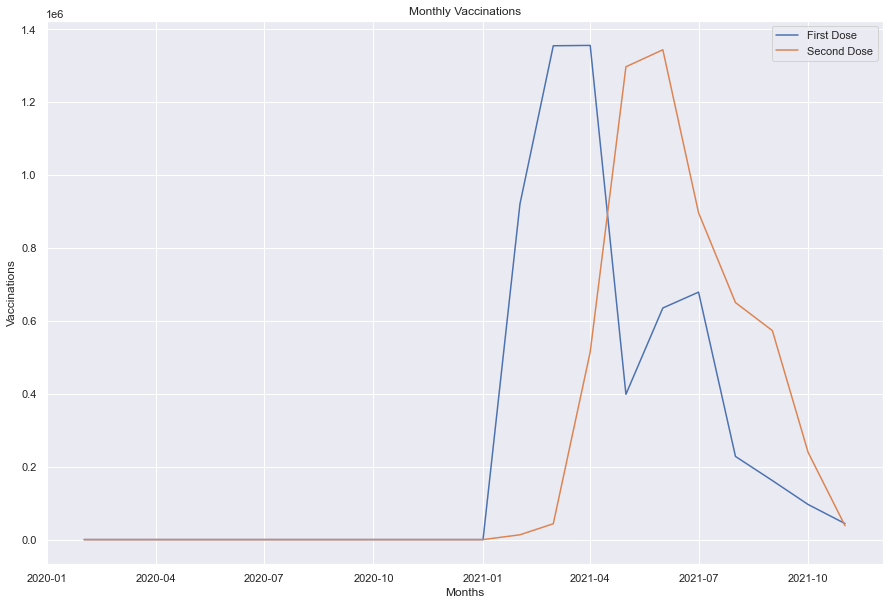

In [60]:
# Plot a linechart to show monthly vaccinations in Gibraltar
fig, ax = plt.subplots() 
ax = sns.lineplot(x='Month', y='First Dose', data=gib_vaccs_month, ci=None).set_title('Monthly Vaccinations')
ax = sns.lineplot(x='Month', y='Second Dose', data=gib_vaccs_month, ci=None)
plt.legend(labels=['First Dose','Second Dose'])
plt.xlabel('Months')
plt.ylabel('Vaccinations')
sns.set(rc = {'figure.figsize':(15,8)})

In [61]:
# Download and save a copy of the chart
fig.savefig('GibraltarMonthlyVaccinations.png', dpi=300)

> `Observations 3.5:`
>- First dose vaccination uptake begins in January 2021 and uptake increases rapidly over the first 3 months. As expected and as a result of the 2 months between vaccine wait time, uptake of the second dose begins 2 to 3 months after initial engagement with first dose.It can be observed that the majority of engagement for each vaccine spans an approximate 3 month duration; after 3 months of vaccine engagement, the plot show that engagement with either dose decreases rapidly. 
>- Engagement with both vaccines does experience a second uptake period but this is not as high as with initial engagement. The plot shows a much higher second engagement phase for the first dose vaccine when compared with the second phase of second vaccine engagement.

## 4 Assignment activity four

The government is looking to promote second dose vaccinations and would like to know the best possible area to test a new campaign. They are looking for the highest number of people who have received a first dose and not a second dose. 
- Where should they target?
- Which provinces have the highest number (actual numbers) and highest relative numbers (second dose only/first dose)?
- Visualise both outputs.

    - Consider additional features (deaths and recoveries)
    - Visualise the data
    - Note observations
    - Do deaths follow the same patterns observed in vaccination data (daily vs cumulative)?
    - Do we need to separate groups of data for specific variables and analyse them in isolation (Others) to be able to observe the patterns?

### 4.1 Calculate vaccination first and second dose difference relationships 

In [62]:
# Use the merged covid stats DataFrame for Assignment week 3
# Display the DataFrame
covid_stat.head()

Province/State       Date  Vaccinated  First Dose  Second Dose  Deaths  \
0       Anguilla 2020-01-22           0           0            0       0   
1       Anguilla 2020-01-23           0           0            0       0   
2       Anguilla 2020-01-24           0           0            0       0   
3       Anguilla 2020-01-25           0           0            0       0   
4       Anguilla 2020-01-26           0           0            0       0   

   Cases  Recovered  Hospitalised      Month  
0      0          0             0 2020-02-01  
1      0          0             0 2020-02-01  
2      0          0             0 2020-02-01  
3      0          0             0 2020-02-01  
4      0          0             0 2020-02-01

In [63]:
# Add new DataFrame with columnn to hold difference between first and second dose
covid_data = pd.DataFrame(covid_stat, columns=['Province/State', 'Date', 'Month', 'Vaccinated',
                                               'Partially Vaccinated', 'First Dose', 'Second Dose',
                                               'Deaths', 'Cases', 'Recovered', 'Hospitalised'])

In [64]:
# Calculate numeric difference between First and Second doses
covid_data['Partially Vaccinated'] = covid_data['First Dose'] - covid_data['Second Dose']

In [65]:
# Calculate Ratio of Interest as percentage: Dose Difference divided by First Dose
covid_data['% Ratio of Interest'] = 100 * covid_data['Partially Vaccinated'] / covid_data['First Dose']

In [66]:
# Replace NaNs with zero
covid_data['% Ratio of Interest'] = covid_data['% Ratio of Interest'].fillna(0)

In [67]:
# Reorder the DataFrame columns
covid_data = pd.DataFrame(covid_data, columns=['Province/State', 'Date', 'Month', 'Vaccinated', 
                                               'Partially Vaccinated', '% Ratio of Interest', 'First Dose', 
                                               'Second Dose', 'Deaths',
                                               'Cases', 'Recovered', 'Hospitalised'])

In [68]:
# Calculate Ratio / percentage of people who have had the second dose
covid_data['% Double Vaxxed'] = 100 * covid_data['Second Dose'] / covid_data['First Dose']

In [69]:
# View DataFrame
covid_data.head()

Province/State       Date      Month  Vaccinated  Partially Vaccinated  \
0       Anguilla 2020-01-22 2020-02-01           0                     0   
1       Anguilla 2020-01-23 2020-02-01           0                     0   
2       Anguilla 2020-01-24 2020-02-01           0                     0   
3       Anguilla 2020-01-25 2020-02-01           0                     0   
4       Anguilla 2020-01-26 2020-02-01           0                     0   

   % Ratio of Interest  First Dose  Second Dose  Deaths  Cases  Recovered  \
0                  0.0           0            0       0      0          0   
1                  0.0           0            0       0      0          0   
2                  0.0           0            0       0      0          0   
3                  0.0           0            0       0      0          0   
4                  0.0           0            0       0      0          0   

   Hospitalised  % Double Vaxxed  
0             0              NaN  
1             0              NaN  
2             0              NaN  
3             0              NaN  
4             0              NaN

In [70]:
# Reorder the columns
covid_data = pd.DataFrame(covid_data, columns=['Province/State', 'Date', 'Month', 'Vaccinated', '% Double Vaxxed', 
                                               'Partially Vaccinated', '% Ratio of Interest', 'First Dose', 
                                               'Second Dose', 'Deaths', 'Cases', 'Recovered', 'Hospitalised'])

In [71]:
# Replace NaNs with zero
covid_data['% Double Vaxxed'] = covid_data['% Double Vaxxed'].fillna(0)

In [72]:
# View DataFrame
covid_data.head()

Province/State       Date      Month  Vaccinated  % Double Vaxxed  \
0       Anguilla 2020-01-22 2020-02-01           0              0.0   
1       Anguilla 2020-01-23 2020-02-01           0              0.0   
2       Anguilla 2020-01-24 2020-02-01           0              0.0   
3       Anguilla 2020-01-25 2020-02-01           0              0.0   
4       Anguilla 2020-01-26 2020-02-01           0              0.0   

   Partially Vaccinated  % Ratio of Interest  First Dose  Second Dose  Deaths  \
0                     0                  0.0           0            0       0   
1                     0                  0.0           0            0       0   
2                     0                  0.0           0            0       0   
3                     0                  0.0           0            0       0   
4                     0                  0.0           0            0       0   

   Cases  Recovered  Hospitalised  
0      0          0             0  
1      0          0             0  
2      0          0             0  
3      0          0             0  
4      0          0             0

In [73]:
# Subset data to exclude Province/State 'Others' which appears to be skewing data findings
covid_data2 = covid_data[covid_data['Province/State'] != 'Others']

In [74]:
# Create a copy
covid_cases = covid_data2

In [75]:
# Group data by Province/State
covid_cases_grouped = covid_cases.groupby('Province/State')[['Vaccinated', 'Partially Vaccinated', 
                                                                '% Ratio of Interest', 'First Dose', 
                                                                'Second Dose', 'Deaths', 'Cases', 'Recovered', 
                                                                'Hospitalised']].sum()

In [76]:
# Sort by Cases
covid_cases_grouped.sort_values(['Cases'], inplace=True, ascending=False)

In [77]:
# Display the DataFrame
covid_cases_grouped

Vaccinated  \
Province/State                                             
Channel Islands                                  3139385   
Gibraltar                                        5606041   
Isle of Man                                      4036345   
Turks and Caicos Islands                         2915136   
Bermuda                                          2690908   
British Virgin Islands                           4933315   
Cayman Islands                                   3363624   
Anguilla                                         4709072   
Falkland Islands (Malvinas)                      3587869   
Montserrat                                       5157560   
Saint Helena, Ascension and Tristan da Cunha     2242421   

                                              Partially Vaccinated  \
Province/State                                                       
Channel Islands                                             148261   
Gibraltar                                                   264745   
Isle of Man                                                 190639   
Turks and Caicos Islands                                    137686   
Bermuda                                                     127073   
British Virgin Islands                                      232988   
Cayman Islands                                              158852   
Anguilla                                                    222398   
Falkland Islands (Malvinas)                                 169438   
Montserrat                                                  243568   
Saint Helena, Ascension and Tristan da Cunha                105889   

                                              % Ratio of Interest  First Dose  \
Province/State                                                                  
Channel Islands                                     -25284.427097     3287646   
Gibraltar                                           -25285.405459     5870786   
Isle of Man                                         -25283.817741     4226984   
Turks and Caicos Islands                            -25284.162256     3052822   
Bermuda                                             -25285.219235     2817981   
British Virgin Islands                              -25284.632164     5166303   
Cayman Islands                                      -25285.319636     3522476   
Anguilla                                            -25284.313699     4931470   
Falkland Islands (Malvinas)                         -25284.792019     3757307   
Montserrat                                          -25285.049001     5401128   
Saint Helena, Ascension and Tristan da Cunha        -25284.609079     2348310   

                                              Second Dose  Deaths    Cases  \
Province/State                                                               
Channel Islands                                   3139385   37130  1957978   
Gibraltar                                         5606041   25412  1413853   
Isle of Man                                       4036345   15051   887133   
Turks and Caicos Islands                          2915136    5612   752618   
Bermuda                                           2690908   10353   685442   
British Virgin Islands                            4933315    3573   284961   
Cayman Islands                                    3363624     911   217756   
Anguilla                                          4709072      24    35315   
Falkland Islands (Malvinas)                       3587869       0    20482   
Montserrat                                        5157560     539     9556   
Saint Helena, Ascension and Tristan da Cunha      2242421       4     1438   

                                              Recovered  Hospitalised  
Province/State                                                         
Channel Islands                                 1027626        363690  
Gibraltar                                        956103        649459

### 4.2 Visualise vaccination dose differences by Province/State

In [78]:
# Create a melted DataFrame for barplot showing actual data
covid_bar_actual = pd.melt(covid_data2, id_vars =['Province/State', 'Date', 'Month'],
                       value_vars =['Vaccinated', 'Partially Vaccinated'])

In [79]:
# Rename Chart variables
covid_bar_actual.rename(columns = {'variable':'Type', 'value':'Count'}, inplace = True)

In [80]:
# Specify plot size and shape
plt.figure(figsize = (20,20))

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

<function matplotlib.pyplot.show(close=None, block=None)>

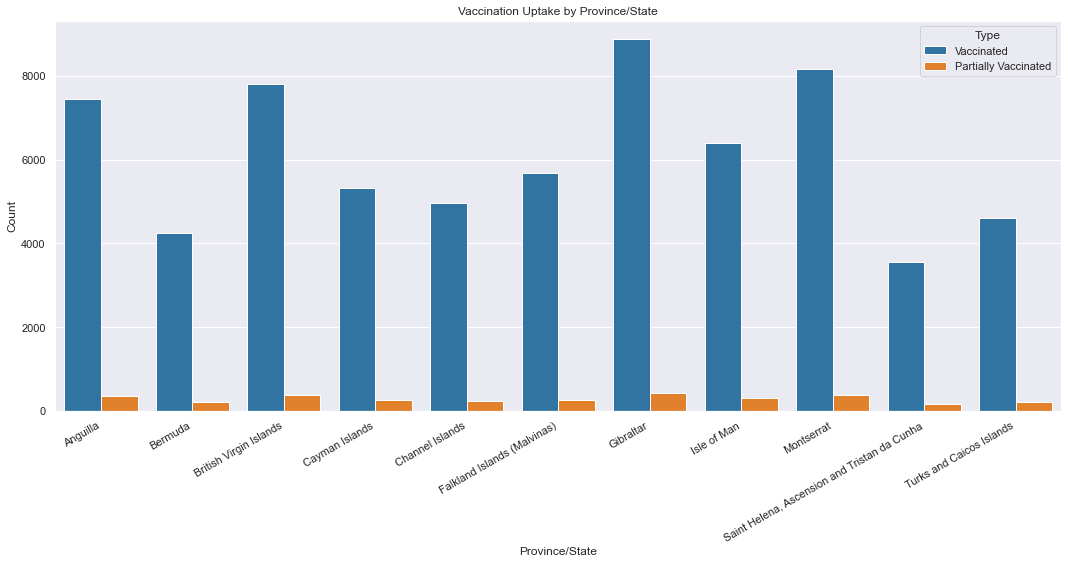

In [81]:
# Plot the chart
ax = sns.barplot(x='Province/State', y='Count', hue='Type', palette='tab10', data=covid_bar_actual, ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30, ha='right')
ax.set_title('Vaccination Uptake by Province/State')
plt.tight_layout()
plt.show

In [82]:
# Download and save a copy of the chart
fig.savefig('VaccinationUptakeProvince.png', dpi=300)

> `Observations 4.2:`
>- Gibraltar and Montserrat show the highest number of people who have not received a second dose when compared with those receiving first doses.
>- In terms of number, there is little difference in terms of volumne of people who have not yet received a second dose.
>- In relative terms, there does not appear to be a particular province/state that has a greater or lower double dose vaccinate engagement rate.
>- Findings also show that most people (96%), regardless of location have engaged with the double vaccine programme.

### 4.3 Deaths over time for each province/state

In [83]:
# Subset covid_data to focus on Date, Deaths and Province/State
death_bydate = pd.DataFrame(covid_data2, columns=['Province/State', 'Month', 'Deaths'])

In [84]:
# View DataFrame
death_bydate.head()

Province/State      Month  Deaths
0       Anguilla 2020-02-01       0
1       Anguilla 2020-02-01       0
2       Anguilla 2020-02-01       0
3       Anguilla 2020-02-01       0
4       Anguilla 2020-02-01       0

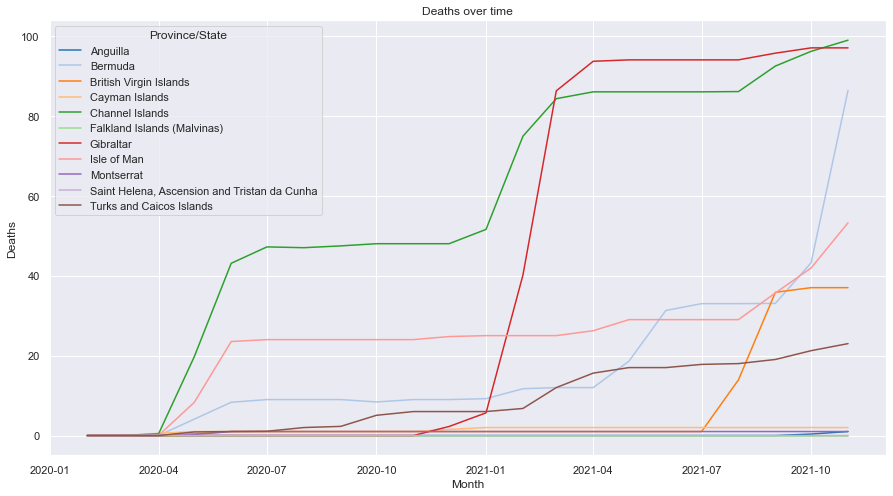

In [85]:
# Plot a linechart to show deaths over time for each Province/State
fig, ax = plt.subplots() 
ax = sns.lineplot(x='Month', y='Deaths', hue='Province/State', palette='tab20', data=death_bydate, ci=None).set(title='Deaths over time')
sns.set(rc = {'figure.figsize':(15,8)})

In [86]:
# Export as image
fig.savefig('DeathsByMonth.png')

> `Observations 4.3:`
>- The Channel Islands and Gibraltar both record the highest levels of covid deaths, although high levels of deaths are recorded approximately 9 months earlier within the Channel Islands than they are for Gibraltar. Initial, rapidly increasing death rates occur between April and June of 2020 in the Channel Island. This initial, rapidly rising death rate is not observed in Gibraltar until January 2021. More deaths within a shorter time span are observed within Gibraltar than can be observed in th initial wave occuring in Channel Islands.
>- The Isle of Man, Bermuda and to a lesser degree, Turks and Caicos Islands, all show a lower and less rapid rate of death. However, this trend changes quite dramatically in the last months of recorded data for Bermuda where death rates can be seen to rise rapidly.
>- A similar pattern can be observed for the British Virgin Islands. Here deaths remain very low throughout until July 2021 when a rapid rise in deaths begins to occur.
>- All other province/states experience consistent and relative low levels of death: Anguilla, Cayman Islands, Falkland Islands, Montserrat, Saint Helena, Ascension and Tristan da Cunha.

In order to show better differentiation / distinction between line plot colour, the Matplotlib Tab20 colour palette has been specified.

### 4.4 Hospitalisations over time for each province/state

In [87]:
# Subset covid_data to focus on Date, Deaths and Province/State
hospitalised_bydate = pd.DataFrame(covid_data2, columns=['Province/State', 'Month', 'Hospitalised'])

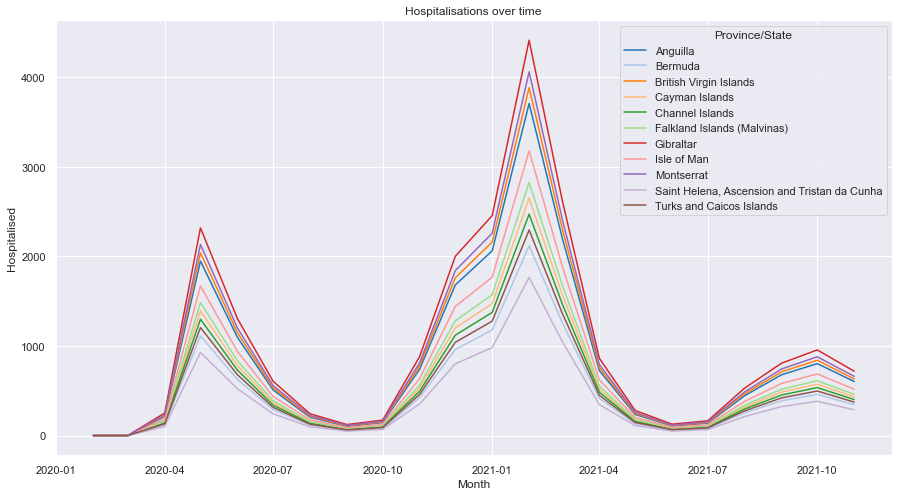

In [88]:
# Plot a linechart to show hospitalisations over time for each Province/State
fig, ax = plt.subplots() 
ax = sns.lineplot(x='Month', y='Hospitalised', hue='Province/State', palette='tab20', data=hospitalised_bydate, ci=None).set(title='Hospitalisations over time')
sns.set(rc = {'figure.figsize':(15,8)})

> `Observations 4.4:`
>- 3 distinct hospitalisation 'waves' can be observed across all provinces/states. 
>- The second wave is the highest and peaks in February / March 2021.
>- The first wave occuring in April / May 2020 is still high but hospitalisations appear to half those of the second wave.
>- A smaller third wave can be observed to peak in October 2021.
>- Gibraltar appears to have the highest levels of hospitalisations and Saint Helena the lowest.

In [89]:
# Export as image
fig.savefig('HospitalisedByMonth.png')

### 4.5 Recoveries over time by province/state

In [90]:
# Subset covid_data to focus on Date, Recovered and Province/State
recovered_bydate = pd.DataFrame(covid_data2, columns=['Province/State', 'Month', 'Recovered'])

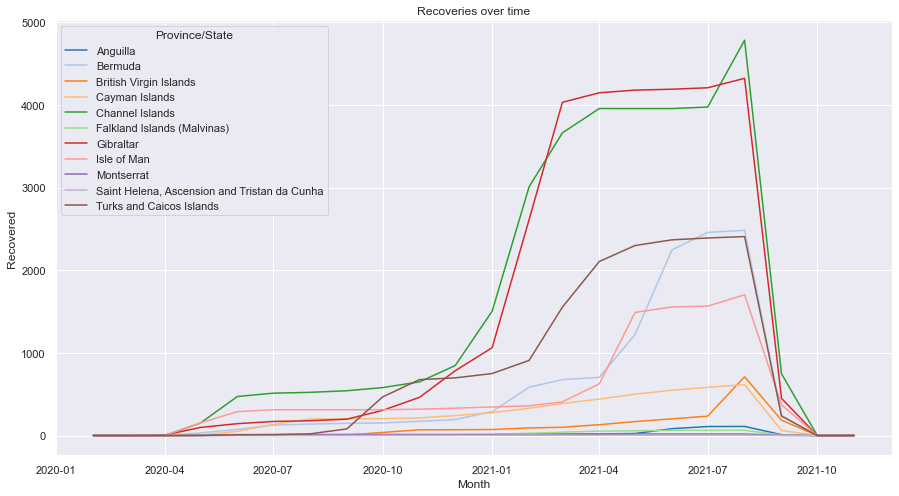

In [91]:
# Plot a linechart to show recoveries over time for each Province/State
fig, ax = plt.subplots() 
ax = sns.lineplot(x='Month', y='Recovered', hue='Province/State', palette='tab20', data=recovered_bydate, ci=None).set(title='Recoveries over time')
sns.set(rc = {'figure.figsize':(15,8)})

In [92]:
# Export as image
fig.savefig('RecoveriesTime.png')

> `Observations 4.5:`
>- Overall, a similar trend can be observed for all provinces/states in terms of growth, rise and decline of recoveries.
>- Higher rates of recovery are generally not observed until January 2021 and most provinces/states show a plateau of recovery levels after higher rates are experienced. 
>- All provinces and state show a rapid decrease in recovery rates at the end of summer 2021. The greatest drop in recovery rates can be observed within the Channel Islands and Gibraltar.

### 4.6 Vaccination engagement over time for each province/state

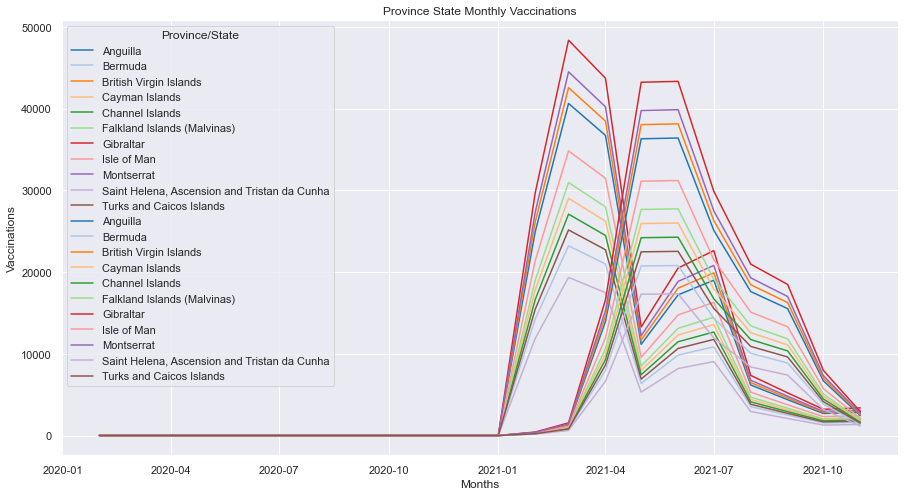

In [93]:
# Plot a linechart to show monthly vaccinations for all provinces/states
fig, ax = plt.subplots() 
ax = sns.lineplot(x='Month', y='First Dose', hue='Province/State', palette='tab20', data=covid_data2, ci=None).set_title('Province State Monthly Vaccinations')
ax = sns.lineplot(x='Month', y='Second Dose', hue='Province/State', palette='tab20', data=covid_data2, ci=None)
plt.xlabel('Months')
plt.ylabel('Vaccinations')
sns.set(rc = {'figure.figsize':(15,8)})

In [94]:
# Export as image
fig.savefig('ProvinceMonthlyVaccinations.png')

> `Observations 4.6:`
>- A chart showing vaccination engagement over time, appears to correlate with the pattern of recoveries:
>- vaccinations and recoveries exhibit a similar 'shape' in terms rise, peak and fall
>- vaccinations and recoveries occur within a similar timeframe

## 5 Assignment activity five
- Determine whether twitter data contains additional `#tags` or keywords that could potentially provide insights into the analysis.
- Search for hash-tags or keywords
- Create DataFrames and visualisations

### 5.1 Explore data

In [95]:
# Import libraries
import pandas as pd
import seaborn as sns
pd.options.display.max_colwidth = 200
sns.set(rc = {'figure.figsize':(15,10)})

In [96]:
# Import the tweet data set
tweets = pd.read_csv('tweets.csv')

In [97]:
# Convert created_at column from object to Date time format
tweets['created_at'] =  pd.to_datetime(tweets['created_at'])

In [98]:
# Determine date of most recent tweet
print(tweets.created_at.max())

2022-05-23 00:00:00


In [99]:
# Determind date of least recent tweet
print(tweets.created_at.min())

2022-05-15 00:00:00


In [100]:
# Check shape
tweets.shape

(3960, 21)

In [101]:
# Get info
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   created_at                 3959 non-null   datetime64[ns]
 1   id                         3959 non-null   float64       
 2   id_str                     3959 non-null   float64       
 3   text                       3959 non-null   object        
 4   truncated                  3959 non-null   object        
 5   source                     3959 non-null   object        
 6   in_reply_to_status_id      0 non-null      float64       
 7   in_reply_to_status_id_str  0 non-null      float64       
 8   in_reply_to_user_id        0 non-null      float64       
 9   in_reply_to_user_id_str    0 non-null      float64       
 10  in_reply_to_screen_name    0 non-null      float64       
 11  contributors               0 non-null      float64       
 12  is_quo

In [102]:
# Display the head
tweets.head()

created_at            id        id_str  \
0 2022-05-23  1.528750e+18  1.528750e+18   
1 2022-05-23  1.528720e+18  1.528720e+18   
2 2022-05-23  1.528650e+18  1.528650e+18   
3 2022-05-23  1.528610e+18  1.528610e+18   
4 2022-05-23  1.528600e+18  1.528600e+18   

                                                                                                                                                                                                      text  \
0  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
1                                                                                             #COVID19 is linked to more #diabetes diagnoses in kids, CDC study finds https://t.co/H5lO1W7Skd via @YouTube   
2  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
3  READ MY NEW OP-ED: IRREVERSIBLE – Many Effects Of COVID19 Are Permanent\nEvidence shows that COVID19 may cause extreme damage to the brain, kidneys, lungs, liver, heart, &amp; can cause amputation...   
4  Advanced healthcare at your fingertips\nhttps://t.co/aUQ93qFsJ4 | +443333053358\n#slough #sloughtownfc #sloughtown #sloughi #windsor #windsorcastle #diabetes #physician #generalphysician\n#hospita...   

  truncated  \
0     False   
1     False   
2     False   
3     False   
4     False   

                                                                                source  \
0        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
1   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   
2        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
3        <a href="https://www.socialjukebox.com" rel="nofollow">The Social Jukebox</a>   
4  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   

   in_reply_to_status_id  in_reply_to_status_id_str  in_reply_to_user_id  \
0                    NaN                        NaN                  NaN   
1                    NaN                        NaN                  NaN   
2                    NaN                        NaN                  NaN   
3                    NaN                        NaN                  NaN   
4                    NaN                        NaN                  NaN   

   in_reply_to_user_id_str  ...  contributors  is_quote_status retweet_count  \
0                      NaN  ...           NaN            False             0   
1                      NaN  ...           NaN            False             0   
2                      NaN  ...           NaN            False             0   
3                      NaN  ...           NaN            False             0   
4                      NaN  ...           NaN            False             0   

   favorite_count  favorited retweeted lang possibly_sensitive  \
0               0      False     False   en              False   
1               1      False     False   en              False   
2               0      False     False   en              False   
3               0      False     False   en              False   
4               0      False     False   en              False   

  quoted_status_id  quoted_status_id_str  
0              NaN                   NaN  
1              NaN                   NaN  
2              NaN                   NaN  
3              NaN                   NaN  
4              NaN                   NaN  

[5 rows x 21 columns]

### 5.2 Check retweet and favorites for relevance

In [103]:
# Check retweets and favorites
tweets.retweet_count.value_counts()

0       2818
1        570
2        190
3         96
4         54
5         33
6         29
7         17
8         14
11        10
14        10
10         9
9          8
17         8
21         6
12         6
19         5
13         5
16         5
28         4
44         3
27         3
23         3
15         3
37         3
38         2
107        2
54         2
67         2
43         2
25         2
65         1
63         1
48         1
85         1
29         1
30         1
22         1
130        1
89         1
398        1
18         1
32         1
466        1
112        1
90         1
319        1
253        1
116        1
304        1
60         1
79         1
1565       1
369        1
56         1
42         1
118        1
199        1
195        1
963        1
24         1
31         1
49         1
33         1
261        1
212        1
52         1
Name: retweet_count, dtype: int64

In [104]:
tweets.favorite_count.value_counts()

0       2240
1        682
2        252
3        174
4        100
5         75
6         51
7         39
8         38
9         24
10        22
11        16
13        15
12        13
17        12
14        12
24        11
15        11
18         8
16         8
25         7
19         7
22         6
29         5
20         5
23         5
21         5
30         4
39         3
31         3
26         3
40         3
53         3
242        2
27         2
81         2
32         2
47         2
48         2
45         2
89         2
43         2
70         2
33         2
185        2
28         2
65         2
181        1
57         1
71         1
293        1
145        1
621        1
837        1
80         1
149        1
909        1
2251       1
44         1
4376       1
1003       1
66         1
140        1
264        1
72         1
3496       1
649        1
766        1
722        1
79         1
317        1
228        1
85         1
169        1
183        1
147        1
582        1

> `Observation 5.2:` 
>- Retweet and favorite data set is relatively small. Therefore not useful to inform insights. Investigate most frequently occuring hashtags to find out if corresponding tweet message content can further inform findings.

### 5.3 Analyse text comments

In [105]:
# Create a new DataFrame containing only the text column contents and convert text object values to string
tweets['text'] = tweets['text'].astype(str)
tweets_text = tweets['text'].apply(lambda x: x if x.strip() != None else None)

In [106]:
# Loop through the messages and create a list of balues containing the # symbol
tags = []
for y in [x.split(' ') for x in tweets_text.values]:
    for z in y:
        if '#' in z:
            tags.append(z)

In [107]:
# Create a Series containing the value counts in tags list
tags = pd.Series(tags).value_counts()

In [108]:
# Display the first 30 records
tags.head(30)

#COVID19                1632
#CovidIsNotOver          472
#China                   262
#covid19                 176
#Covid19                 148
#COVID                   108
#covid                   104
#Greece                  103
#coronavirus             100
#PeoplesVaccine.          84
#CoronaUpdate             84
#Omicron                  83
#COVID2020                82
#covid19uk                80
#CoronavirusOutbreak      80
#COVID19Pandemic          80
#monkeypox                77
#globalhealth             76
#publichealth             72
#healthtech               69
#COVID2019                69
#datascience              66
#data                     66
#analytics                64
#Shanghai                 63
#Covid_19                 63
#datavisualization        63
#pandemic                 60
#Athens                   55
#Beijing                  50
dtype: int64

In [109]:
# Convert the Series into a DataFrame
# Remove the whitespaces
data = pd.DataFrame(tags).reset_index()

In [110]:
# Rename the columns
data.columns = ['word', 'count']

In [111]:
# Make count datatype be integer
data['count'] = data['count'].astype(int)
data.head(30)

word  count
0               #COVID19   1632
1        #CovidIsNotOver    472
2                 #China    262
3               #covid19    176
4               #Covid19    148
5                 #COVID    108
6                 #covid    104
7                #Greece    103
8           #coronavirus    100
9       #PeoplesVaccine.     84
10         #CoronaUpdate     84
11              #Omicron     83
12            #COVID2020     82
13            #covid19uk     80
14  #CoronavirusOutbreak     80
15      #COVID19Pandemic     80
16            #monkeypox     77
17         #globalhealth     76
18         #publichealth     72
19           #healthtech     69
20            #COVID2019     69
21          #datascience     66
22                 #data     66
23            #analytics     64
24             #Shanghai     63
25             #Covid_19     63
26    #datavisualization     63
27             #pandemic     60
28               #Athens     55
29              #Beijing     50

In [112]:
# Display records where the count is greater than 100
display(data.loc[(data['count']>100)])

word  count
0         #COVID19   1632
1  #CovidIsNotOver    472
2           #China    262
3         #covid19    176
4         #Covid19    148
5           #COVID    108
6           #covid    104
7          #Greece    103

### 5.4 Plot hashtags occuring more than 100 times

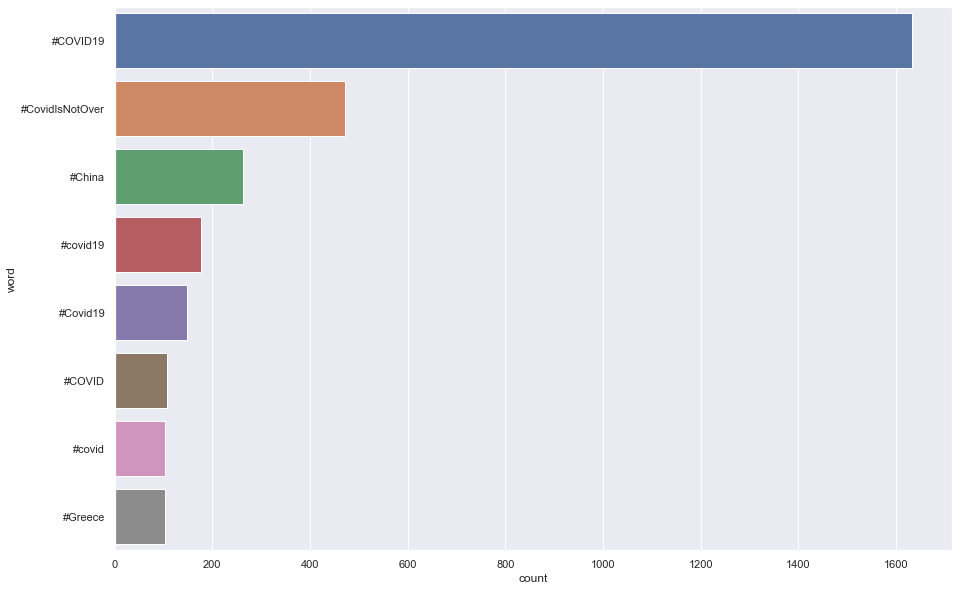

In [113]:
# Plot the records where the count is greater than 100
ax = sns.barplot(x='count', y='word', data=data.loc[(data['count']>100)])

In [114]:
# Export as image
fig.savefig('HashtagsOver100.png')

> `Observation 5.4:`
>- The Covid19 is by far the most using hashtag on Twitter at the time of data collection.
>- 6 of 8 most frequently used hashtags use the word covid in them
>- The remaining 2 hashtags not including the word covid, are #China and #Greece
>- Recommendation would be to further investigate reasons for China and Greece being popular hashtags at time of data collection. The purposed of this action would be to assess whether there covid related reasons for the popularity of China and Greece hashtags.
>- Recommendation also to refine tweet text further to enable analysis of text content of messages using these popular hashtags.

### 5.5 Assess content of tweets messages

In [115]:
# Manual list of stopwords to be removed
sw_list = ['a', 'about', 'actually', 'almost', 'also', 'athough', 'always', 'am', 'an', 'and',
           'via', 'been',  'any', 'are', 'as', 'at', 'be', 'became', 'become', 'but', 'by', 'can', 
           'could', 'did', 'were', 'do', 'does', 'each', 'either', 'else', 'for', 'from', 'had', 
           'has', 'have', 'hence', 'per',  'how', 'i', 'if', 'in', 'is', 'it', 'its', 'just', 'way', 'I',
           'may', 'maybe', 'me', 'might', 'mine', 'Im', 'mine', 'must', 'must', 'my', 'my', 'neither', 
           'not', 'not', 'of', 'oh', 'ok', 'when', 'being', 'whenever', 'where', 'whereas', 'wherever', 
           'whether', 'which', 'while', 'who', 'whoever', 'their', 'who', 'whom', 'why', 'will',
           'with', 'within', 'without', 'would', 'yes', 'yet', 'you', 'your', 'to', 'the', 'of',
           'and', 'are', 'was', 'this', 'on', 'now', 'over', 'us', 'so', 'more', 'our', 'they', 'we',
           'after', 'or', 'no', 'still', 'day', 'out', 'our', 'one', 'all', '&amp;', '-', '|', 'that', '']

In [116]:
# Convert the text of the tweets to a list
tweets_text_values = tweets_text.values

In [117]:
# Convert tweets to a list of worlds
tweets_text_values_word = [x.split(' ') for x in tweets_text_values]

In [118]:
# Create empty list
tweets_text_values_word_all = []

In [119]:
# Append to the list and remove 'http', mentions and selected keywords
tweets_text_values_word_all = [z for y in tweets_text_values_word for z in y if 'http' not in z and not z.startswith(('@','#')) and z.lower() not in sw_list]

In [120]:
# Create a Series with the value counts of keywords identified
tweets_text_values_word_all = pd.Series(tweets_text_values_word_all).value_counts()

In [121]:
# Display the first 50 entires of the Series
tweets_text_values_word_all.head(50)

Covid          348
people         303
Greece         275
COVID-19       267
cases          228
Athens,        211
Athens         209
new            205
COVID          198
Covid-19       153
vaccine        147
COVID19        143
up             142
China          141
covid          140
I’m            125
like           125
get            118
cause          118
safe           111
New            111
first          108
pandemic       106
Please         104
join           100
until          100
during          99
–               99
than            98
said            97
protection      96
reported        95
Coronavirus     94
sign            91
safe.           90
Deaths          90
Health          89
positive        88
stand           87
2022            86
denied          86
urgently        86
urging          86
some            86
•               85
health          85
everyone’s      85
petition.       84
No-one          84
need.           84
dtype: int64

In [122]:
# Create a Data Frame out of the Series
# Use first 21 entries
data2 = pd.DataFrame(tweets_text_values_word_all.head(15)).reset_index()

In [123]:
# Rename columns
data2.columns = ['word', 'count']

In [124]:
# Remove whites spaces
data2 = data2[data2['word'].str.strip('word') != ' ']

### 5.6 Visualise Hashtag word popularity

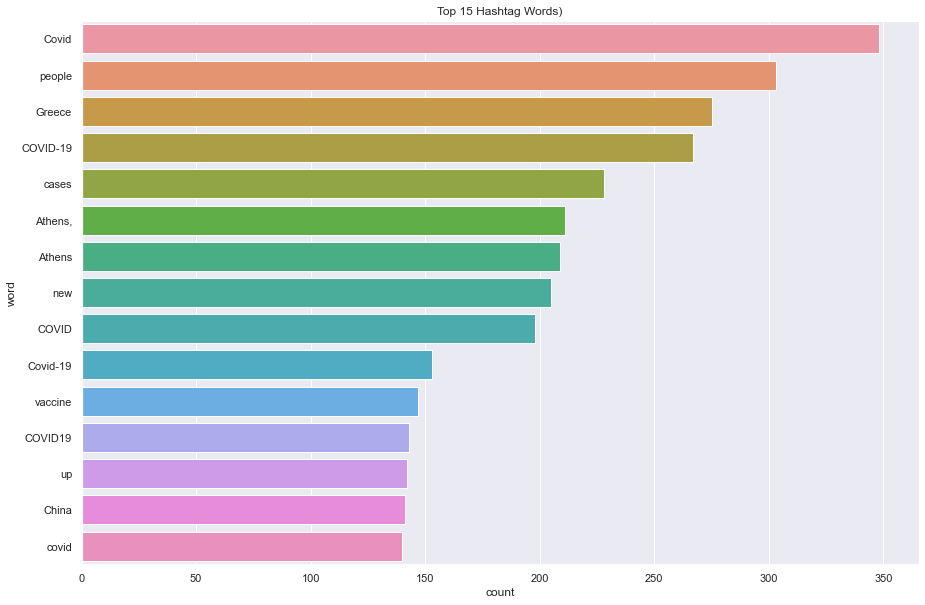

In [125]:
# Display the result as a horizontal barplot
ax = sns.barplot(x='count', y='word', data=data2).set_title('Top 15 Hashtag Words)')

In [126]:
# Export as image
fig.savefig('FilteredTopHashtags.png')

### 5.7 Analysis the contents of tweets containing the words 'cases' and 'safe'

In [127]:
# Create DataFrame
dft = pd.DataFrame(tweets_text_values)

In [128]:
# Name column
dft.columns = ['Tweets']

In [129]:
# Create a subset of the DataFrame contaiing only tweets with the words cases and safe in them
subset = dft[dft['Tweets'].str.contains('cases', 'safe')]

In [130]:
# loop through the DataFrame and print each element
for i in subset.index:
    print('Tweet: ',i)
    print(subset.loc[i, 'Tweets'], '\n')

Tweet:  38
More than 90% of those infected with COVID-19 show no symptoms
but the rest of the infected cases had either Type 2 diabetes, cardiovascular diseases, hypertension, and/or cancer, which means people with obesity  show severe symptoms.
#paraphrase
#COVID19
https://t.co/ZEtNx7f4jE 

Tweet:  65
The CDC investigates mysterious cases of #PediatricHepatitis. Find out about this and more, including stories on diabetes' effect on #COVID19 outcomes and prioritization of future #cancer prevention for adolescent and young adult cancer survivors.
https://t.co/VlHgXy6Afg 

Tweet:  77
Pregnant women have a low risk of having severe symptoms; however, in some cases -- especially those with obesity or gestational diabetes, or who are old, or who have underlying diseases -- they may have severe symptoms. 

#COVID19 https://t.co/4SG3GAMx04 

Tweet:  190
Public Health Ontario's latest data on #COVID19 cases in ON, incl TO, is now available: https://t.co/oUxcc69p2S. 

TPH's case counts dashboar

> `Observations 5.7:`
>- A substantial volume of tweets (3960) has been collected and analysis shows the most popular hashtag and message content relates the Covid-19.
>- The twitter data date range covers 9 days worth of tweets which start on the 15th May 2022 and end on the 23rd May 2022.
>- To add context and greater understanding of data findings, tweets messages were filtered to those containing the words 'cases' and 'safe'. There were a significant amount of references to the covid pandemic not being over and of new cases emerging within China.
>- However, this qualitative tweet information does not align with the timescales of the main quantitative data sets which contain data relevant to the January 2020 to October 2021 time range. Therefore it is difficult to make meaningful and contextualising connections across the quantitative and qualitative data sets.

## 6. Assignment activity 6

- Demonstrate using external function and interpret results
- Note observations
- Answer additional questions posed by the government:
    - What is the difference between qualitative and quantitative data?
    - How can these be used in business predictions?
    - Why is continuous improvement required?
    - Can we not just implement the project and move on to other pressing matters?
- As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Does that mean we can ignore data ethics?

### 6.1 Load libraries and prepare data sets

In [131]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from matplotlib.pyplot import figure

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Get multiple outputs in the same cell.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [132]:
# Load data into DataFrames
ds1 = pd.read_csv('covid_19_uk_cases.csv', index_col=['Date'], parse_dates=['Date'])
ds2 = pd.read_csv('covid_19_uk_vaccinated.csv')

In [133]:
# View DataFrame
ds1.head()

Province/State  Country/Region      Lat     Long  \
Date                                                          
2020-01-22       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-23       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-24       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-25       Anguilla  United Kingdom  18.2206 -63.0686   
2020-01-26       Anguilla  United Kingdom  18.2206 -63.0686   

           ISO 3166-1 Alpha 3-Codes                  Sub-region Name  \
Date                                                                   
2020-01-22                      AIA  Latin America and the Caribbean   
2020-01-23                      AIA  Latin America and the Caribbean   
2020-01-24                      AIA  Latin America and the Caribbean   
2020-01-25                      AIA  Latin America and the Caribbean   
2020-01-26                      AIA  Latin America and the Caribbean   

            Intermediate Region Code  Deaths  Cases  Recovered  Hospitalised  
Date                                                                          
2020-01-22                        29     0.0    0.0        0.0           0.0  
2020-01-23                        29     0.0    0.0        0.0           0.0  
2020-01-24                        29     0.0    0.0        0.0           0.0  
2020-01-25                        29     0.0    0.0        0.0           0.0  
2020-01-26                        29     0.0    0.0        0.0           0.0

### 6.2 Subset data set to required options: Channel Island hospitalisations

In [134]:
# Subset data
cases_sample = ds1[['Province/State','Hospitalised']]

In [135]:
# Select data for Channel Islands only
cases_sample_ci = cases_sample[cases_sample['Province/State'] == 'Channel Islands']

In [136]:
# Check datatypes
cases_sample_ci.dtypes

Province/State     object
Hospitalised      float64
dtype: object

In [137]:
# Convert Hospitalised datatype to integer
cases_sample_ci['Hospitalised'] = cases_sample_ci['Hospitalised'].astype(int)

In [138]:
cases_sample_ci.dtypes

Province/State    object
Hospitalised       int64
dtype: object

In [139]:
# Define function to plot moving averages
def plot_moving_average(series, window, plot_intervals=False, scale=1.96):
    
    # Create a rolling window to calculate the rolling mean using the series.rolling function
    rolling_mean = series.rolling(window=window).mean()
    
    # Declare the dimensions for the plot, plot name and plot the data consisting of the rolling mean from above 
    plt.figure(figsize=(18,4))
    plt.title('Moving average\n window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Simple moving average trend')

    
    # Plot confidence intervals for smoothed values
    if plot_intervals:
        
        # Calculate the mean absolute square 
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        
        # Calculate the standard deviation using numpy's std function
        deviation = np.std(series[window:] - rolling_mean[window:])
        
        # Calculate the upper and lower bounds 
        lower_bound = rolling_mean - (mae + scale * deviation)
        upper_bound = rolling_mean + (mae + scale * deviation)
        
        # Name and style upper and lower bound lines and labels 
        plt.plot(upper_bound, 'r--', label='Upper bound / Lower bound')
        plt.plot(lower_bound, 'r--')
    
    # Plot the actual values for the entire timeframe
    plt.plot(series[window:], label='Actual values')
    plt.grid(True)

In [140]:
# Define function to calculate the mean absolute error
def mean_absolute_error(a, b): return abs(b - a)

### 6.3 Plot Channel Islands hospitalisation moving average

Text(0.5, 1.0, '7 Day moving average of hospitalisations')

<Figure size 1080x576 with 0 Axes>

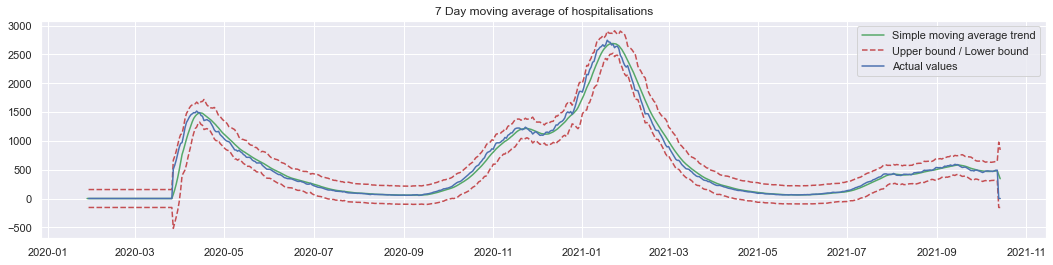

<Figure size 1080x576 with 0 Axes>

In [141]:
# Plot Hospitalisations with a 7 day window for the Channel Islands region
plot_moving_average(cases_sample_ci.Hospitalised, 7, plot_intervals=True)
plt.legend(loc='best')
plt.title('7 Day moving average of hospitalisations')
plt.figure(figsize=(15, 8))
plt.show(block=False)

In [142]:
# Export as image
fig.savefig('MoveAvg.png')

> Observations 6.3:
>- The 7 moving average plot shows that for most of the time, the actual and average hospitalisations are both closely aligned and centred within the upper and lower error bounds.
>- Changes to this pattern can be observed most during time of rapid rates on hospitalisation increases and decreases.

### 6.4 Plot of actual Channel Island hospitalisations

In [143]:
# Convert DataFrame to Series
ci_hospitalisations = pd.Series(cases_sample_ci['Hospitalised'])

Text(0.5, 1.0, 'Actual Hospitalisations')

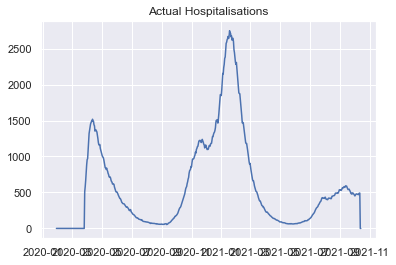

In [144]:
# Plot the actual values for the entire timeframe
fig, ax = plt.subplots() 
plt.plot(ci_hospitalisations[7:], label='Actual values')
plt.title('Actual Hospitalisations')
sns.set(rc = {'figure.figsize':(50,8)})
plt.show(block=False)

In [145]:
# Export as image
fig.savefig('ActualHospitalisations.png')

> Observation 6.4:
>- Although following the same pattern of rolling average hospitalisations, the plot of the actual hospitalisations reveals a greater degree of details in terms of daily fluctuations.

### 6.5 Calculate the mean absolute square for Channel Islands

In [146]:
# Calculate Channel Islands rolling mean
ci_rolling_mean = ci_hospitalisations.rolling(window=7).mean()

In [147]:
# Create a Data Frame out of the Series
ci_rolling_meandf = pd.DataFrame(ci_rolling_mean ).reset_index()

In [148]:
# Rename columns
ci_rolling_meandf.columns = ['Date', 'Rolling Hospitalised']

In [149]:
# Replace NaNs with zero
ci_rolling_meandf['Rolling Hospitalised'] = ci_rolling_meandf['Rolling Hospitalised'].fillna(0)

In [150]:
# Convert Hospitalised datatype to integer
ci_rolling_meandf['Rolling Hospitalised'] = ci_rolling_meandf['Rolling Hospitalised'].astype(int)

In [151]:
# View Channel Islands Rolling Mean DataFrame
ci_rolling_meandf.head()

Date  Rolling Hospitalised
0 2020-01-22                     0
1 2020-01-23                     0
2 2020-01-24                     0
3 2020-01-25                     0
4 2020-01-26                     0

In [152]:
# Calculate Channel Islands mean absolute Square
ci_mae = mean_absolute_error(ci_hospitalisations[7:], ci_rolling_mean[7:])

In [153]:
# Create a Data Frame out of the Series
ci_maedf = pd.DataFrame(ci_mae).reset_index()

In [154]:
# Rename columns
ci_maedf.columns = ['Date', 'MAE Hospitalised']

In [155]:
# Replace any NaNs with zero
ci_maedf['MAE Hospitalised'] = ci_maedf['MAE Hospitalised'].fillna(0)

In [156]:
# Convert Hospitalised datatype to integer
ci_maedf['MAE Hospitalised'] = ci_maedf['MAE Hospitalised'].astype(int)

In [157]:
# View Channel Islands Rolling Mean Absolute Average DataFrame
ci_maedf.head()

Date  MAE Hospitalised
0 2020-01-29                 0
1 2020-01-30                 0
2 2020-01-31                 0
3 2020-02-01                 0
4 2020-02-02                 0

### 6.6 Find the top 3 days where MAE is highest between actual and 7-day rolling average

In [158]:
# Read and load the data
ds_test = pd.read_csv('covid_19_uk_cases.csv')

In [159]:
# Subset the data to drop unnecessary columns
test = ds_test[['Province/State','Date', 'Hospitalised']]

In [160]:
# Subset the data to Channel Islands only
test_ci = test[test['Province/State'] == 'Channel Islands']

In [161]:
# Convert Date column from object string to Date time format
test_ci['Date'] =  pd.to_datetime(test_ci['Date'])

In [162]:
# Convert Hospitalised datatype to integer
test_ci['Hospitalised'] = test_ci['Hospitalised'].astype(int)

In [163]:
# Display DataFrame
test_ci.head()

Province/State       Date  Hospitalised
2528  Channel Islands 2020-01-22             0
2529  Channel Islands 2020-01-23             0
2530  Channel Islands 2020-01-24             0
2531  Channel Islands 2020-01-25             0
2532  Channel Islands 2020-01-26             0

In [164]:
# Merge DataFrame with rolling mean DataFrame
test_ci_merge2 = pd.merge(test_ci, ci_rolling_meandf, how='left', on='Date')

In [165]:
# Merge again to include MAE
test_ci_merge3 = pd.merge(test_ci_merge2, ci_maedf, how='left', on='Date')

In [166]:
# Replace NaNs with zero
test_ci_merge3['MAE Hospitalised'] = test_ci_merge3['MAE Hospitalised'].fillna(0)

In [167]:
# Convert Hospitalised datatype to integer
test_ci_merge3['MAE Hospitalised'] = test_ci_merge3['MAE Hospitalised'].astype(int)

In [168]:
sorted_merge = test_ci_merge3.sort_values(by='MAE Hospitalised', ascending=False)

### 6.7 View top 3 days where MAE is between actual and 7-day rolling average

In [169]:
sorted_merge.head(3)

Province/State       Date  Hospitalised  Rolling Hospitalised  \
65  Channel Islands 2020-03-27           509                    72   
66  Channel Islands 2020-03-28           579                   155   
67  Channel Islands 2020-03-29           667                   250   

    MAE Hospitalised  
65               436  
66               423  
67               416

> `Observations 6.7:`
>- The 3 highest Mean Absolute Error hospitalisations that fall between actual and 7 day rolling average occur
on the 27th, 28th and 29th March 2020 (within the Channel Islands region)

### 6.8 Calculate the standard deviation

In [170]:
# Calculate the standard deviation using numpy's std function
deviation = np.std(ci_hospitalisations[7:] - ci_rolling_mean[7:])

In [171]:
# Print standard deviation
deviation

79.38918779446286

> `Observation 6.8:`
>- The standard deviation is 79.4

### Question 2:

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

### 6.9 Consultant calculation

The consultant performed a calculation that looks interesting, but the team is unsure about what the intention was and how to interpret the output. Can you offer some insights into the meaning of the code and output in the cell below? Is it useful?

In [172]:
ds_test = pd.read_csv('covid_19_uk_cases.csv')

In [173]:
test = ds_test[['Province/State','Date', 'Hospitalised']]

In [174]:
test_ci = test[test['Province/State'] == 'Channel Islands']

In [175]:
# Return the top three days with biggest difference between daily value and rolling 7-day mean
st = test_ci.copy()
st_rolling = st['Hospitalised'].rolling(window=7).mean()
st['error'] = mean_absolute_error(st['Hospitalised'][7:], st_rolling[7:])
st.sort_values('error', ascending=False).head(3)

Province/State        Date  Hospitalised       error
2593  Channel Islands  2020-03-27         509.0  436.285714
2594  Channel Islands  2020-03-28         579.0  423.571429
2595  Channel Islands  2020-03-29         667.0  416.285714

> Observations 6.9
>- This code appears to be another (quicker) way to calculate top 3 days where the MAE (indicted by error) is between actual and 7-day rolling average. As the code is more concise it looks to offer a more pythonic approach to this calculation than the steps I took in 6.6 and 6.7.

### 6.2) Presentation expectations:
- **Question 1**: We have heard of both qualitative and quantitative data from the previous consultant. What are the differences between the two? Should we use only one or both of these types of data and why? How can these be used in business predictions? Could you provide examples of each?
- **Question 2**: We have also heard a bit about the need for continuous improvement. Why should this be implemented, it seems like a waste of time. Why can’t we just implement the current project as it stands and move on to other pressing matters?
- **Question 3**: As a government, we adhere to all data protection requirements and have good governance in place. We only work with aggregated data and therefore will not expose any personal details. Have we covered everything from a data ethics standpoint? Is there anything else we need to implement from a data ethics perspective? 

**Question 1: Quantitative and qualitative data**

Quantitiative data is numerical in format whereas qualitative data is object or text based. Qualitative data can also be referred to as catergorial in type as it can contain data counts the amount of items within a category. 

Quantitative data is used for statistical analysis and as such can effectively provide high level over view aggregated findings. Although numerical data can offer powerful insights, qualitative information can enrich and contextualise findings further. For example, analysis of customer social media content can reveal insights into customer engagement and buying behaviours. Such information is a very powerful tool to inform business development and sales direction.

**Question 2: Continuous Improvement**

The process of continuous improvement is underpinned by a supportive business culture which is built around the  the following 4 principles:
- customer centricity
- product quality
- process effiency
- business profitability

Essentially continuous improvement aims to make consistent and incremental enhancements to business processes. It places the customer at the heart of all it's activities and offers products and services that consistently reflect changing customer preference and behaviour. As a result of sustained customer engagement, business profitability is also maximised.

**Question 3: Data Ethics**

The analysis client, the UK government, adheres to all data protection requirements and has good governance in place. They also wish to know if there is anything else they need to implement from a data ethics perspective.

Data ethics frameworks are concerned with the morals and values that can guide appropriate behaviour in terms of the impact that all areas of data use can have on people and society. Ethical and regulatory practice do not always algin. In order to maintain the sustainability of data sharing activities, the 

In order to maintain the sustainability of data sharing activities, the UK Government Centre for Data Ethics and Innovation (CDEI) recently identified the need for personal data sharing to be 'conducted in a way that is trustworthy, aligned with society’s values and people’s expectations. Public consent is crucial to the long term sustainability of data sharing activity.' ('Addressing trust in public sector data use', CDEI, May 2020) 

The key findings of this report also identify opportunities for the public sector to maximise the beneficial use of personal information. Among these opportunties are the introduction of accessible digital records for members of the public as well as the creation and sharing of clear guidlines that communicate expecations in terms of personal information.

This report advises that these two opportunities be explored futher by the client. To enable further disucssion and required opportunities, the full report can be accessed online at [GOV.UK](https://www.gov.uk/government/publications/cdei-publishes-its-first-report-on-public-sector-data-sharing/addressing-trust-in-public-sector-data-use#contents) 